### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import levene
import datetime

In [2]:
file_path = '/Users/ericjiang/Desktop/msci719_assignment/ass2/'
file_name = 'data.xlsx'
df = pd.read_excel(file_path + file_name)

In [3]:
df.head()

,Product,identity,student,Tourism,staff,Sat 1st Apr 2017,Sun 2nd Apr 2017,Mon 3rd Apr 2017,Tue 4th Apr 2017,Wed 5th Apr 2017,...,Fri 22nd Sep 2017,Sat 23rd Sep 2017,Sun 24th Sep 2017,Mon 25th Sep 2017,Tue 26th Sep 2017,Wed 27th Sep 2017,Thu 28th Sep 2017,Fri 29th Sep 2017,Sat 30th Sep 2017,Revenue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-$5 LUSH COUPON ON $40,event,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.00000
2,Mango,tourism,NaN,NaN,NaN,0.0,0.0,40.0,0.0,0.0,...,0.0,80.0,0.0,0.0,40.0,0.0,0.0,0.0,80.0,4310.83334
3,S. Caramel Staff,Staff,NaN,NaN,1.0,0.0,0.0,0.0,0.0,60.0,...,0.0,30.0,30.0,0.0,60.0,60.0,30.0,30.0,30.0,10226.21211
4,S. Caramel St,student,1,NaN,NaN,390.0,0.0,806.0,0.0,650.0,...,52.0,26.0,26.0,494.0,390.0,494.0,156.0,442.0,78.0,25201.79338


In [4]:
# the student, Tourism, staff indicators are redundant
df = df.drop(['student','Tourism','staff'],axis=1, inplace=False)
# remove the first row with all null values
df = df.drop([0],axis=0, inplace=False)

In [5]:
df['Product'].unique()
# the product type is quite messy, which needs further data cleansing and categorization

array(['-$5 LUSH COUPON ON $40', 'Mango', 'S. Caramel Staff',
       'S. Caramel St', 'Chocolate', 'Mango Staff', 'Strawberry',
       'Mint Choco  St', 'Chocolate Staff', 'Asia Research Free Scoop',
       'S. Caramel', 'Mango St', 'Pure Coconut Staff',
       'Building Promotion', 'Pure Coco .', 'Chocolate St',
       'Mint Choco Staff', 'Strawberry Staff', 'Mint Choco',
       'Pure Coco . St', 'Waffle Cone', 'Green Tea', 'Strawberry St',
       'Waffle Cone Staff', 'Hazelnut', 'Chai Tea st', 'Chai Tea Staff',
       'Vanilla Bean', 'Hezelnut Staff', 'Hazelnut St', 'Chai Tea',
       'Green Tea St', 'Green Tea Staff', 'Pina Colada',
       'Free Scoop Grassroot', 'Banana Caramel  /', 'Gift Voucher Reg',
       'Banana Caramel St', 'Coffee', 'Waffle Cone St',
       'Pina Colada Staff', 'Cherry Almond', 'YY Seasame',
       'Pina Colada St', 'Coffee Staff', 'Lime Coconut',
       'Chocoate Cookies', 'IceCream Sand St', 'Banana Staff',
       'Ice Cream SAND', 'YY Seasame Staff', 'Cof

In [6]:
df['identity'].unique()

array(['event', 'tourism', 'Staff', 'student', nan], dtype=object)

In [7]:
df[(df['identity']=='event')|(df['identity']==np.nan)]
# the event records do not have any value for this analysis

,Product,identity,Sat 1st Apr 2017,Sun 2nd Apr 2017,Mon 3rd Apr 2017,Tue 4th Apr 2017,Wed 5th Apr 2017,Thu 6th Apr 2017,Fri 7th Apr 2017,Sat 8th Apr 2017,...,Fri 22nd Sep 2017,Sat 23rd Sep 2017,Sun 24th Sep 2017,Mon 25th Sep 2017,Tue 26th Sep 2017,Wed 27th Sep 2017,Thu 28th Sep 2017,Fri 29th Sep 2017,Sat 30th Sep 2017,Revenue
1,-$5 LUSH COUPON ON $40,event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.0
10,Asia Research Free Scoop,event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-130.0,-234.0,-208.0,-260.0,-26.0,-858.0
14,Building Promotion,event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-728.0
35,Free Scoop Grassroot,event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-884.0,0.0,0.0,0.0,-26.0,0.0,-910.0
37,Gift Voucher Reg,event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,LUSH FOOT POWDER,event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,Lush Shampoo Bar $60,event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,Registration day $20,event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-42.0,0.0,0.0,-6.0,-24.0,-48.0,-54.0,-84.0,-60.0,-708.0
86,Staff Off -$2,event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-298.0
104,ZALORA $30 Spent Coupon,event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df = df [df['identity'].isin(['tourism', 'Staff', 'student'])].reset_index().drop(columns=['index'])

In [9]:
df['Product'].unique()

array(['Mango', 'S. Caramel Staff', 'S. Caramel St', 'Chocolate',
       'Mango Staff', 'Strawberry', 'Mint Choco  St', 'Chocolate Staff',
       'S. Caramel', 'Mango St', 'Pure Coconut Staff', 'Pure Coco .',
       'Chocolate St', 'Mint Choco Staff', 'Strawberry Staff',
       'Mint Choco', 'Pure Coco . St', 'Waffle Cone', 'Green Tea',
       'Strawberry St', 'Waffle Cone Staff', 'Hazelnut', 'Chai Tea st',
       'Chai Tea Staff', 'Vanilla Bean', 'Hezelnut Staff', 'Hazelnut St',
       'Chai Tea', 'Green Tea St', 'Green Tea Staff', 'Pina Colada',
       'Banana Caramel  /', 'Banana Caramel St', 'Coffee',
       'Waffle Cone St', 'Pina Colada Staff', 'Cherry Almond',
       'YY Seasame', 'Pina Colada St', 'Coffee Staff', 'Lime Coconut',
       'Chocoate Cookies', 'IceCream Sand St', 'Banana Staff',
       'Ice Cream SAND', 'YY Seasame Staff', 'Coffee  St', 'Red Bean',
       'Vanilla Bean St', 'Vanilla Bean Staff', 'Ginger',
       'Cherry Almond Fudge st', 'Ice Cream Sand Staff', 'Mis

In [10]:
result = []
for item in df['Product']:
    if (item.find('Chocolate')) != -1:
        result.append('Chocolate')
    elif (item.find('Hazelnut')) != -1:
        result.append('Hazelnut')
    elif (item.find('Coconut')) != -1:
        result.append('Coconut')
    elif (item.find('Green Tea')) != -1:
        result.append('Green Tea')
    elif (item.find('Caramel')) != -1:
        result.append('Caramel')
    elif (item.find('Vanilla')) != -1:
        result.append('Vanilla')
    elif (item.find('Pina Colada')) != -1:
        result.append('Pina Colada')
    elif (item.find('Coffee')) != -1:
        result.append('Coffee')
    elif (item.find('Almond')) != -1:
        result.append('Almond')
    elif (item.find('Waffle Cone')) != -1:
        result.append('Waffle Cone')
    elif (item.find('Bean')) != -1:
        result.append('Bean')
    else:
        result.append('N/A')

df['product_cleaned'] = result 

In [11]:
df[df['product_cleaned']=='N/A'].to_csv('check_1.csv')
# perform data check to see whether I miss some edge cases
# there are 2 spelling mistakes and 2 abbreviations in the dataset, which should be added to the relevant flavours

In [12]:
# the modified/improved code to categorize falvours
result = []
for item in df['Product']:
    if (item.find('Choco')) != -1:
        result.append('Chocolate')
    elif ((item.find('Hazelnut')) != -1) or ((item.find('Hezelnut')) != -1):
        result.append('Hazelnut')
    elif (item.find('Coco')) != -1:
        result.append('Coconut')
    elif (item.find('Green Tea')) != -1:
        result.append('Green Tea')
    elif (item.find('Caramel')) != -1:
        result.append('Caramel')
    elif (item.find('Vanilla')) != -1:
        result.append('Vanilla')
    elif (item.find('Pina Colada')) != -1:
        result.append('Pina Colada')
    elif (item.find('Coffee')) != -1:
        result.append('Coffee')
    elif (item.find('Almond')) != -1:
        result.append('Almond')
    elif (item.find('Waffle Cone')) != -1:
        result.append('Waffle Cone')
    elif (item.find('Bean')) != -1:
        result.append('Bean')
    else:
        result.append('N/A')

df['product_cleaned'] = result 

In [13]:
df[df['product_cleaned']=='N/A'].to_csv('check_2.csv')
# now the data is clean, including all the flavours required

In [14]:
result = []
for item in df['product_cleaned']:
    if item in ['Chocolate','Hazelnut','Coconut','Green Tea','Caramel']:
        result.append('popular level 1')
    elif item in ['Vanilla','Pina Colada','Coffee','Almond','Waffle Cone','Bean']:
        result.append('popular level 2')
    else:
        result.append('N/A')

df['category'] = result

In [15]:
df.to_csv('check_3.csv')

In [16]:
df = df.drop(['Product','Revenue'],axis=1, inplace=False)

In [17]:
df['identity'].unique()

array(['tourism', 'Staff', 'student'], dtype=object)

In [18]:
# modify the identity to a more consistent format
result = []
for item in df['identity']:
    if item == 'tourism':
        result.append('tourist')
    elif item == 'Staff':
        result.append('staff')
    elif item == 'student':
        result.append('student')

df['identity']=result

In [19]:
df.head(10)

,identity,Sat 1st Apr 2017,Sun 2nd Apr 2017,Mon 3rd Apr 2017,Tue 4th Apr 2017,Wed 5th Apr 2017,Thu 6th Apr 2017,Fri 7th Apr 2017,Sat 8th Apr 2017,Sun 9th Apr 2017,...,Sat 23rd Sep 2017,Sun 24th Sep 2017,Mon 25th Sep 2017,Tue 26th Sep 2017,Wed 27th Sep 2017,Thu 28th Sep 2017,Fri 29th Sep 2017,Sat 30th Sep 2017,product_cleaned,category
0,tourist,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,0.0,0.0,40.0,0.0,0.0,0.0,80.0,N/A,N/A
1,staff,0.0,0.0,0.0,0.0,60.0,60.0,30.0,30.0,0.0,...,30.0,30.0,0.0,60.0,60.0,30.0,30.0,30.0,Caramel,popular level 1
2,student,390.0,0.0,806.0,0.0,650.0,520.0,494.0,208.0,0.0,...,26.0,26.0,494.0,390.0,494.0,156.0,442.0,78.0,Caramel,popular level 1
3,tourist,40.0,0.0,0.0,0.0,120.0,0.0,0.0,80.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,Chocolate,popular level 1
4,staff,30.0,0.0,60.0,0.0,90.0,60.0,0.0,30.0,0.0,...,60.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,N/A,N/A
5,tourist,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,N/A,N/A
6,student,208.0,0.0,338.0,0.0,416.0,104.0,312.0,208.0,0.0,...,104.0,26.0,182.0,104.0,0.0,78.0,78.0,0.0,Chocolate,popular level 1
7,staff,30.0,0.0,60.0,0.0,60.0,30.0,30.0,90.0,0.0,...,30.0,0.0,0.0,0.0,0.0,270.0,30.0,0.0,Chocolate,popular level 1
8,tourist,40.0,0.0,40.0,0.0,80.0,0.0,0.0,0.0,0.0,...,80.0,0.0,40.0,40.0,0.0,40.0,0.0,40.0,Caramel,popular level 1
9,student,338.0,0.0,234.0,0.0,260.0,468.0,130.0,26.0,0.0,...,156.0,78.0,572.0,52.0,26.0,0.0,52.0,26.0,N/A,N/A


### Part 1

In [20]:
df_1 = df.drop(['identity','product_cleaned'],axis=1, inplace=False)

In [21]:
df_1 = df_1[df_1['category'].isin(['popular level 1','popular level 2'])].reset_index().drop(columns=['index'])

In [22]:
df_1 = df_1.groupby('category').agg('sum').reset_index()

In [23]:
df_1 = df_1.T.reset_index()

In [24]:
df_1 = df_1.drop([0],axis=0, inplace=False)
df_1 = df_1.rename(columns={'index': 'date', 0: 'popular_level_1', 1: 'popular_level_2'})\
       .reset_index().drop(columns=['index'])

In [25]:
df_1

,date,popular_level_1,popular_level_2
0,Sat 1st Apr 2017,1412,291
1,Sun 2nd Apr 2017,0,0
2,Mon 3rd Apr 2017,2128,321
3,Tue 4th Apr 2017,0,0
4,Wed 5th Apr 2017,3078,253
...,...,...,...
178,Tue 26th Sep 2017,1262,318
179,Wed 27th Sep 2017,1529,374
180,Thu 28th Sep 2017,1632,150
181,Fri 29th Sep 2017,1802,358


In [26]:
result = []
for date in df_1['date']:
    date_new = date[4:8]
    if date_new[1] not in ['0','1','2','3','4','5','6','7','8','9']:
        date_modified = date[0:3]+' '+date[4]+' '+date[-8:]
        result.append(date_modified)
    else:
        date_modified = date[0:3]+' '+date[4:6]+' '+date[-8:]
        result.append(date_modified)

df_1['date_modified'] = result
    

In [27]:
result = []
for date in df_1['date_modified']:
    result.append(datetime.datetime.strptime(date,'%a %d %b %Y'))
df_1['date_new'] = result

In [28]:
df_1

,date,popular_level_1,popular_level_2,date_modified,date_new
0,Sat 1st Apr 2017,1412,291,Sat 1 Apr 2017,2017-04-01
1,Sun 2nd Apr 2017,0,0,Sun 2 Apr 2017,2017-04-02
2,Mon 3rd Apr 2017,2128,321,Mon 3 Apr 2017,2017-04-03
3,Tue 4th Apr 2017,0,0,Tue 4 Apr 2017,2017-04-04
4,Wed 5th Apr 2017,3078,253,Wed 5 Apr 2017,2017-04-05
...,...,...,...,...,...
178,Tue 26th Sep 2017,1262,318,Tue 26 Sep 2017,2017-09-26
179,Wed 27th Sep 2017,1529,374,Wed 27 Sep 2017,2017-09-27
180,Thu 28th Sep 2017,1632,150,Thu 28 Sep 2017,2017-09-28
181,Fri 29th Sep 2017,1802,358,Fri 29 Sep 2017,2017-09-29


In [29]:
df_1['month'] = pd.DatetimeIndex(df_1['date_new']).month

In [30]:
df_1 = df_1.drop(['date','date_modified','date_new'],axis=1, inplace=False)
df_1 = df_1.groupby('month').agg('sum').reset_index()

In [31]:
df_1

,month,popular_level_1,popular_level_2
0,4,33606.84100,6973.68278
1,5,23755.66663,7449.99999
2,6,23797.86359,9700.89392
3,7,24393.24528,8823.84906
4,8,19534.00000,9577.83333
5,9,28822.16668,8850.33334


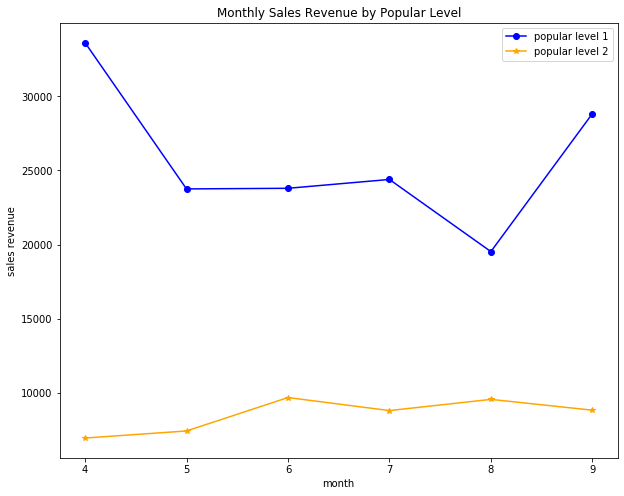

In [32]:
plt.figure(figsize=(10,8))
plt.plot('month','popular_level_1',data=df_1,color='blue',marker='o',label='popular level 1')
plt.plot('month','popular_level_2',data=df_1,color='orange',marker='*',label='popular level 2')
plt.xlabel('month')
plt.ylabel('sales revenue')
plt.title('Monthly Sales Revenue by Popular Level')
plt.legend(loc='upper right')
plt.show()

In [33]:
# to test u1-u2>2000, modify u2 to u2+2000 as u2_new
df_1['popular_level_2_modified'] = df_1['popular_level_2'] + 2000

In [34]:
# summary statistics
u1,u2_new=np.mean(df_1['popular_level_1']),np.mean(df_1['popular_level_2_modified'])
sd1,sd2_new=np.std(df_1['popular_level_1']),np.std(df_1['popular_level_2_modified'])
print(u1,u2_new)
print(sd1,sd2_new)

25651.63053 10562.765403333333
4460.5257690359085 1019.8030740511662


In [35]:
stat, p = levene(df_1['popular_level_1'],df_1['popular_level_2_modified'])
stat, p
# p>0.05, we do not reject H0, which means the variances of two samples are statistically equal

(2.563551402081902, 0.14043548283378937)

In [36]:
# H0:u1<=u2_new  H1:u1>u2_new (here u2_new is the modified u2, which is the original u2+2000)
# equal variance
def t_test(x,y,alternative='both-sided'):
            t, double_p = ttest_ind(x,y,equal_var = True)
            if alternative == 'both-sided':
                pval = double_p
            elif alternative == 'greater':
                if np.mean(x) > np.mean(y):
                    pval = double_p/2.
                else:
                    pval = 1.0 - double_p/2.
            elif alternative == 'less':
                if np.mean(x) < np.mean(y):
                    pval = double_p/2.
                else:
                    pval = 1.0 - double_p/2.
            return (t,pval)

t_test(df_1['popular_level_1'], df_1['popular_level_2_modified'],alternative='greater')
# p<0.001, so we reject H0

(7.373806420674885, 1.1933167674502398e-05)

### Part 2

In [37]:
df_2 = df.drop(['product_cleaned'],axis=1, inplace=False)
df_2 = df_2[df_2['category'].isin(['popular level 1','popular level 2'])].reset_index().drop(columns=['index'])

In [38]:
df_2 = df_2.groupby(['category','identity']).agg('sum').reset_index()

In [39]:
df_2

,category,identity,Sat 1st Apr 2017,Sun 2nd Apr 2017,Mon 3rd Apr 2017,Tue 4th Apr 2017,Wed 5th Apr 2017,Thu 6th Apr 2017,Fri 7th Apr 2017,Sat 8th Apr 2017,...,Thu 21st Sep 2017,Fri 22nd Sep 2017,Sat 23rd Sep 2017,Sun 24th Sep 2017,Mon 25th Sep 2017,Tue 26th Sep 2017,Wed 27th Sep 2017,Thu 28th Sep 2017,Fri 29th Sep 2017,Sat 30th Sep 2017
0,popular level 1,staff,120.0,0.0,150.0,0.0,300.0,150.0,120.0,180.0,...,150.0,120.0,210.0,90.0,30.0,90.0,150.0,330.0,150.0,60.0
1,popular level 1,student,1092.0,0.0,1898.0,0.0,2418.0,1534.0,1820.0,1144.0,...,494.0,624.0,494.0,208.0,1352.0,1092.0,1274.0,1222.0,1612.0,390.0
2,popular level 1,tourist,200.0,0.0,80.0,0.0,360.0,10.0,50.0,160.0,...,40.0,0.0,200.0,40.0,130.0,80.0,105.0,80.0,40.0,160.0
3,popular level 2,staff,42.0,0.0,36.0,0.0,24.0,30.0,54.0,6.0,...,72.0,12.0,60.0,6.0,0.0,6.0,18.0,30.0,84.0,6.0
4,popular level 2,student,233.0,0.0,285.0,0.0,221.0,223.0,286.0,203.0,...,289.0,253.0,62.0,170.0,500.0,304.0,340.0,112.0,226.0,181.0
5,popular level 2,tourist,16.0,0.0,0.0,0.0,8.0,0.0,0.0,8.0,...,0.0,40.0,96.0,48.0,0.0,8.0,16.0,8.0,48.0,40.0


In [40]:
df_2a = df_2[df_2['category']=='popular level 1']

In [41]:
df_2a = df_2a.T.reset_index()

In [42]:
df_2a = df_2a.drop([0,1],axis=0, inplace=False)
df_2a = df_2a.rename(columns={'index': 'date', 0: 'staff', 1: 'student', 2: 'tourist'})\
        .reset_index().drop(columns=['index'])

In [43]:
df_2a

,date,staff,student,tourist
0,Sat 1st Apr 2017,120,1092,200
1,Sun 2nd Apr 2017,0,0,0
2,Mon 3rd Apr 2017,150,1898,80
3,Tue 4th Apr 2017,0,0,0
4,Wed 5th Apr 2017,300,2418,360
...,...,...,...,...
178,Tue 26th Sep 2017,90,1092,80
179,Wed 27th Sep 2017,150,1274,105
180,Thu 28th Sep 2017,330,1222,80
181,Fri 29th Sep 2017,150,1612,40


In [44]:
df_2a[(df_2a['staff']==0)&(df_2a['student']==0)&(df_2a['tourist']==0)].to_csv('check_4.csv')

In [45]:
result = []
for date in df_2a['date']:
    date_new = date[4:8]
    if date_new[1] not in ['0','1','2','3','4','5','6','7','8','9']:
        date_modified = date[0:3]+' '+date[4]+' '+date[-8:]
        result.append(date_modified)
    else:
        date_modified = date[0:3]+' '+date[4:6]+' '+date[-8:]
        result.append(date_modified)

df_2a['date_modified'] = result
    

In [46]:
result = []
for date in df_2a['date_modified']:
    result.append(datetime.datetime.strptime(date,'%a %d %b %Y'))
df_2a['date_new'] = result

In [47]:
df_2a = df_2a.drop(['date','date_modified'],axis=1, inplace=False)

In [48]:
df_2a

,staff,student,tourist,date_new
0,120,1092,200,2017-04-01
1,0,0,0,2017-04-02
2,150,1898,80,2017-04-03
3,0,0,0,2017-04-04
4,300,2418,360,2017-04-05
...,...,...,...,...
178,90,1092,80,2017-09-26
179,150,1274,105,2017-09-27
180,330,1222,80,2017-09-28
181,150,1612,40,2017-09-29


/Library/Anaconda/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


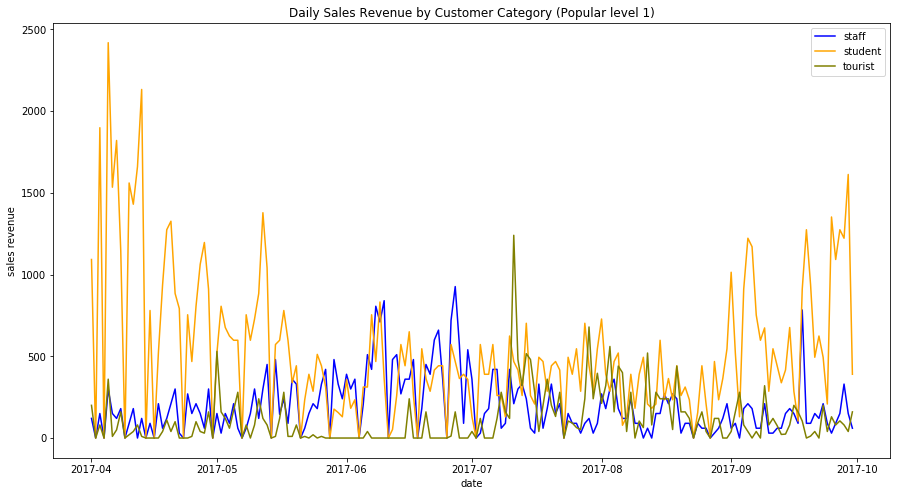

In [49]:
plt.figure(figsize=(15,8))
plt.plot('date_new','staff',data=df_2a,color='blue',label='staff')
plt.plot('date_new','student',data=df_2a,color='orange',label='student')
plt.plot('date_new','tourist',data=df_2a,color='olive',label='tourist')
plt.xlabel('date')
plt.ylabel('sales revenue')
plt.title('Daily Sales Revenue by Customer Category (Popular level 1)')
plt.legend(loc='upper right')
plt.show()

In [50]:
df_2a_1 = df_2a[df_2a['date_new']<='2017-05-26']
df_2a_2 = df_2a[(df_2a['date_new']>='2017-05-27')&(df_2a['date_new']<='2017-08-26')]
df_2a_3 = df_2a[df_2a['date_new']>='2017-08-27']

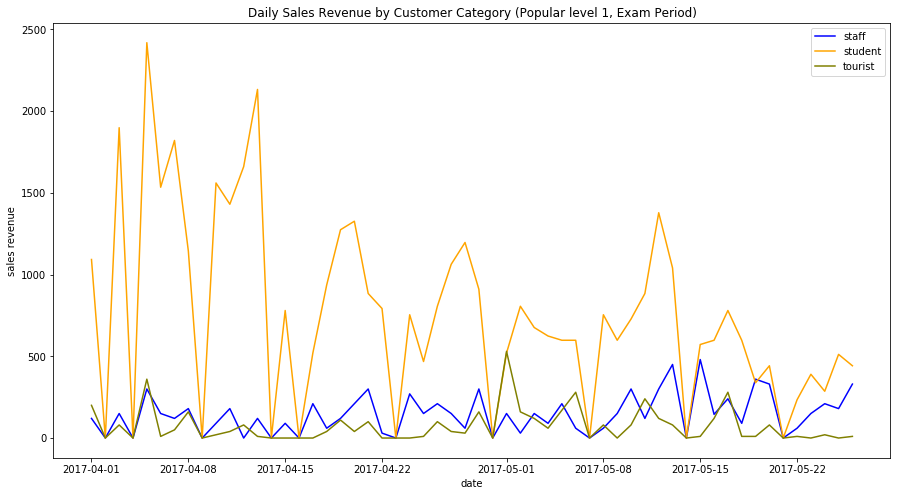

In [51]:
# academic term/exam period
plt.figure(figsize=(15,8))
plt.plot('date_new','staff',data=df_2a_1,color='blue',label='staff')
plt.plot('date_new','student',data=df_2a_1,color='orange',label='student')
plt.plot('date_new','tourist',data=df_2a_1,color='olive',label='tourist')
plt.xlabel('date')
plt.ylabel('sales revenue')
plt.title('Daily Sales Revenue by Customer Category (Popular level 1, Exam Period)')
plt.legend(loc='upper right')
plt.show()

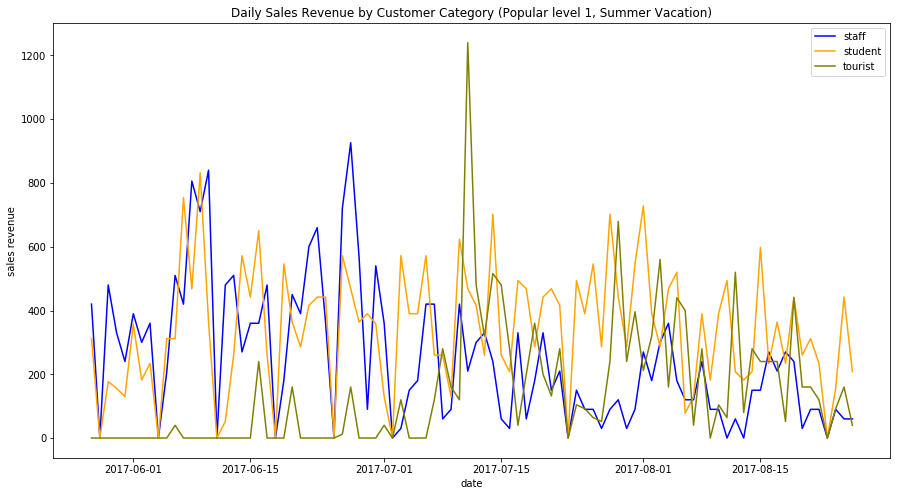

In [52]:
# summer vacation
plt.figure(figsize=(15,8))
plt.plot('date_new','staff',data=df_2a_2,color='blue',label='staff')
plt.plot('date_new','student',data=df_2a_2,color='orange',label='student')
plt.plot('date_new','tourist',data=df_2a_2,color='olive',label='tourist')
plt.xlabel('date')
plt.ylabel('sales revenue')
plt.title('Daily Sales Revenue by Customer Category (Popular level 1, Summer Vacation)')
plt.legend(loc='upper right')
plt.show()

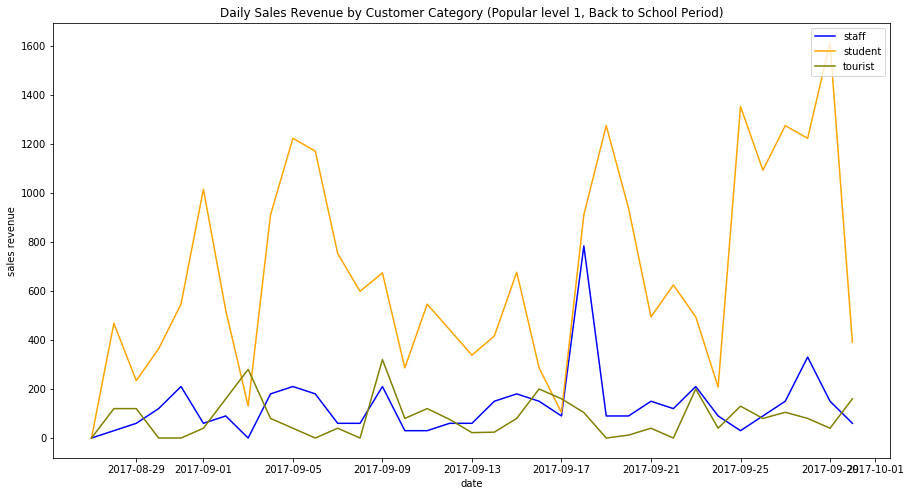

In [53]:
# back to school period
plt.figure(figsize=(15,8))
plt.plot('date_new','staff',data=df_2a_3,color='blue',label='staff')
plt.plot('date_new','student',data=df_2a_3,color='orange',label='student')
plt.plot('date_new','tourist',data=df_2a_3,color='olive',label='tourist')
plt.xlabel('date')
plt.ylabel('sales revenue')
plt.title('Daily Sales Revenue by Customer Category (Popular level 1, Back to School Period)')
plt.legend(loc='upper right')
plt.show()

In [54]:
df_2b = df_2[df_2['category']=='popular level 2']
df_2b = df_2b.T.reset_index()
df_2b = df_2b.drop([0,1],axis=0, inplace=False)
df_2b = df_2b.rename(columns={'index': 'date', 3: 'staff', 4: 'student', 5: 'tourist'})\
        .reset_index().drop(columns=['index'])

In [55]:
df_2b[(df_2b['staff']==0)&(df_2b['student']==0)&(df_2b['tourist']==0)].to_csv('check_5.csv')

In [56]:
result = []
for date in df_2b['date']:
    date_new = date[4:8]
    if date_new[1] not in ['0','1','2','3','4','5','6','7','8','9']:
        date_modified = date[0:3]+' '+date[4]+' '+date[-8:]
        result.append(date_modified)
    else:
        date_modified = date[0:3]+' '+date[4:6]+' '+date[-8:]
        result.append(date_modified)

df_2b['date_modified'] = result

In [57]:
result = []
for date in df_2b['date_modified']:
    result.append(datetime.datetime.strptime(date,'%a %d %b %Y'))
df_2b['date_new'] = result

In [58]:
df_2b = df_2b.drop(['date','date_modified'],axis=1, inplace=False)

In [59]:
df_2b

,staff,student,tourist,date_new
0,42,233,16,2017-04-01
1,0,0,0,2017-04-02
2,36,285,0,2017-04-03
3,0,0,0,2017-04-04
4,24,221,8,2017-04-05
...,...,...,...,...
178,6,304,8,2017-09-26
179,18,340,16,2017-09-27
180,30,112,8,2017-09-28
181,84,226,48,2017-09-29


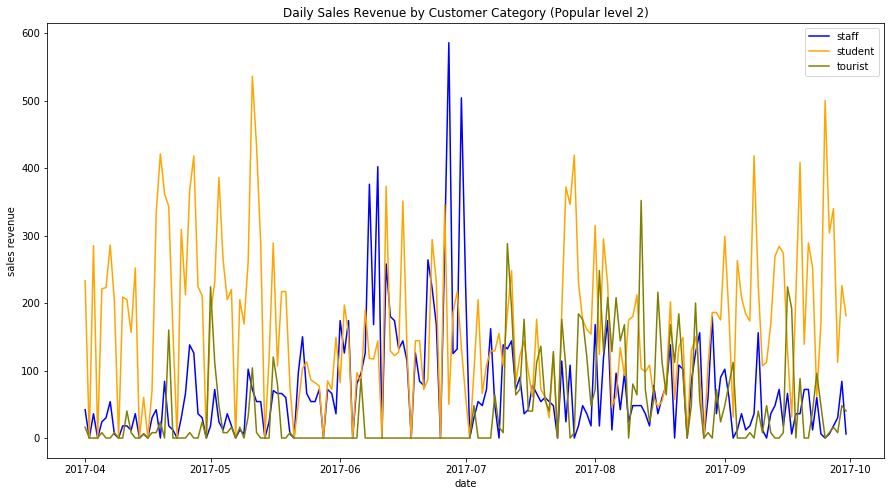

In [60]:
plt.figure(figsize=(15,8))
plt.plot('date_new','staff',data=df_2b,color='blue',label='staff')
plt.plot('date_new','student',data=df_2b,color='orange',label='student')
plt.plot('date_new','tourist',data=df_2b,color='olive',label='tourist')
plt.xlabel('date')
plt.ylabel('sales revenue')
plt.title('Daily Sales Revenue by Customer Category (Popular level 2)')
plt.legend(loc='upper right')
plt.show()

In [61]:
df_2b_1 = df_2b[df_2b['date_new']<='2017-05-26']
df_2b_2 = df_2b[(df_2b['date_new']>='2017-05-27')&(df_2b['date_new']<='2017-08-26')]
df_2b_3 = df_2b[df_2b['date_new']>='2017-08-27']

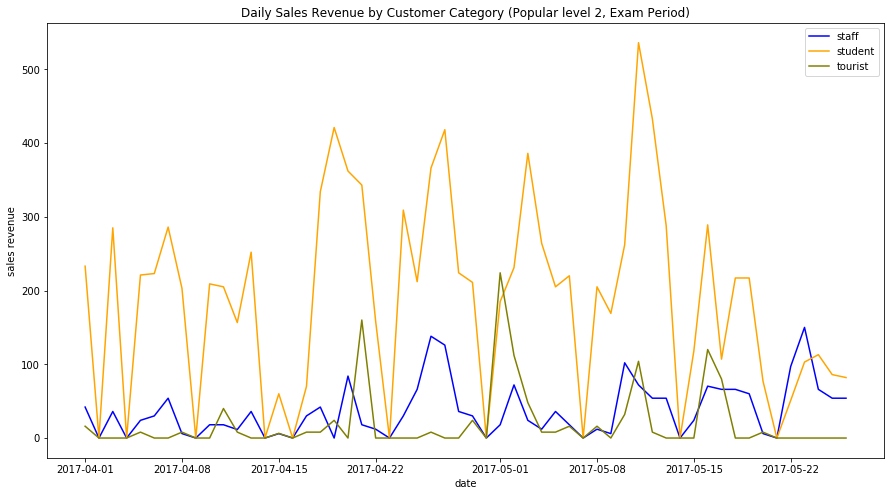

In [62]:
# academic term/exam period
plt.figure(figsize=(15,8))
plt.plot('date_new','staff',data=df_2b_1,color='blue',label='staff')
plt.plot('date_new','student',data=df_2b_1,color='orange',label='student')
plt.plot('date_new','tourist',data=df_2b_1,color='olive',label='tourist')
plt.xlabel('date')
plt.ylabel('sales revenue')
plt.title('Daily Sales Revenue by Customer Category (Popular level 2, Exam Period)')
plt.legend(loc='upper right')
plt.show()

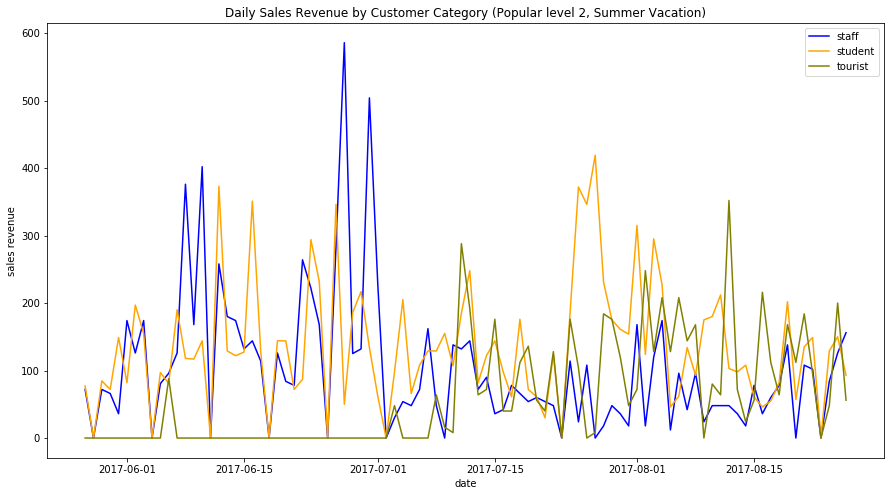

In [63]:
# summer vacation
plt.figure(figsize=(15,8))
plt.plot('date_new','staff',data=df_2b_2,color='blue',label='staff')
plt.plot('date_new','student',data=df_2b_2,color='orange',label='student')
plt.plot('date_new','tourist',data=df_2b_2,color='olive',label='tourist')
plt.xlabel('date')
plt.ylabel('sales revenue')
plt.title('Daily Sales Revenue by Customer Category (Popular level 2, Summer Vacation)')
plt.legend(loc='upper right')
plt.show()

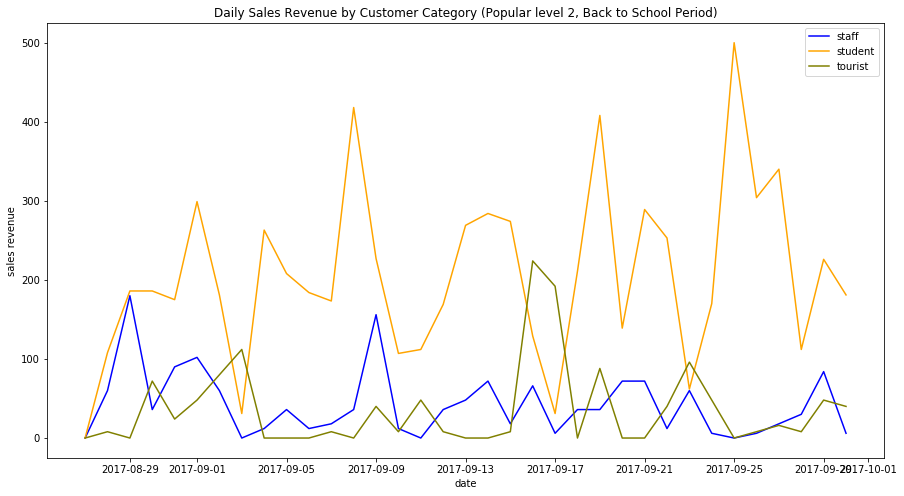

In [64]:
# back to school period
plt.figure(figsize=(15,8))
plt.plot('date_new','staff',data=df_2b_3,color='blue',label='staff')
plt.plot('date_new','student',data=df_2b_3,color='orange',label='student')
plt.plot('date_new','tourist',data=df_2b_3,color='olive',label='tourist')
plt.xlabel('date')
plt.ylabel('sales revenue')
plt.title('Daily Sales Revenue by Customer Category (Popular level 2, Back to School Period)')
plt.legend(loc='upper right')
plt.show()